In [13]:
import tensorflow as tf
import numpy as np
import os
import time

import os
import glob
import sys
import random
from argparse import ArgumentParser

# third-party imports
import tensorflow as tf
import numpy as np
from keras.backend.tensorflow_backend import set_session
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import multi_gpu_model 
import matplotlib
# matplotlib.use('agg')
import nibabel as nib
from skimage import transform
from importlib import reload
import matplotlib.pyplot as plt

# project imports
import datagenerators
import networks
import losses
import utils
import unet

sys.path.append('ext/neuron')
import neuron.callbacks as nrn_gen

sess = tf.keras.backend.get_session()

In [14]:
# import SimpleITK as sitk
# import matplotlib.pyplot as plt

# import cv2


# def show(x):
#     plt.imshow(sitk.GetArrayFromImage(x),'gray')
    
# def resample(image, transform):
#     reference_image = image
#     interpolator = sitk.sitkLinear
#     default_value = 100.0
#     return sitk.Resample(image, transform,
#                         interpolator, default_value)

# def distance(p1,p2):
#     return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

In [15]:
x = []
x1 = []
y = []
for f in sorted(glob.glob('sample_data/orig/*.jpg')):
    x.append(plt.imread(f)[:,:,0])
for f in sorted(glob.glob('sample_data/masks/*.jpg')):
    x1.append(plt.imread(f)[:,:,0])
for f in sorted(glob.glob('sample_data/transformed/*.jpg')):
    y.append(plt.imread(f)[:,:,0])
    


500
(256, 256)


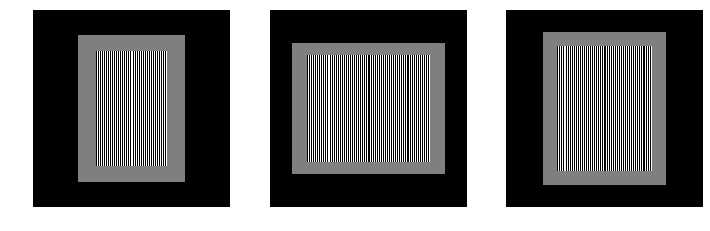

In [16]:
# print(len(x))
print(len(x))
print(x[0].shape)

def crop(a):
    return a[32:224,32:224]

i=0
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(np.squeeze(crop(x[i])),'gray')

i=1
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(np.squeeze(crop(x[i])),'gray')

i=2
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(np.squeeze(crop(x[i])),'gray')
plt.savefig('stg_1.png')

plt.show()

# i=1
# plt.subplot(1,2,1)
# plt.axis('off')
# plt.imshow(np.squeeze(x[i]),'gray')

# plt.subplot(1,2,2)
# plt.axis('off')
# plt.imshow(np.squeeze(y[i]),'gray')
# plt.show()


In [17]:
img_size = 256
input_shape = (img_size, img_size, 1)

x = np.array(x).reshape((-1,)+input_shape)/255.
x1 = np.array(x1).reshape((-1,)+input_shape)/255.
y = np.array(y).reshape((-1,)+input_shape)/255.
y1 = np.repeat(np.zeros_like(y),repeats=2,axis=-1)
print(x.shape)

(500, 256, 256, 1)


In [18]:
input_shape = (img_size, img_size, 1)
src = tf.keras.layers.Input(input_shape)
mask = tf.keras.layers.Input(input_shape)

reload(networks)

nf_enc = [16, 32, 32, 32]
nf_dec = [32, 32, 32, 32, 8, 8]

model = networks.generator(src, mask, nf_enc, nf_dec, flow_out=False)
outputs = model.outputs

model.compile(loss='mse', optimizer='adam')
# model.fit([x,x1], y, epochs=5, batch_size=1)

In [19]:
# model.fit([x,x1], y, epochs=200, batch_size=8)

In [20]:
model.load_weights('../models/simplified_tumor.h5')

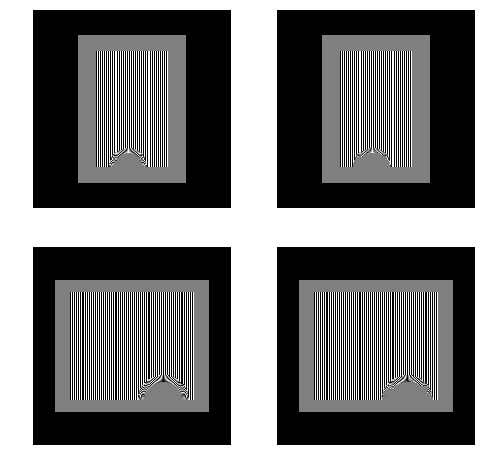

In [21]:
i=0

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(np.squeeze(crop(y[i])),'gray')

pred = model.predict([x[i:i+1], x1[i:i+1]])

plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(np.squeeze(crop(pred[0])),'gray')

i=1

plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(np.squeeze(crop(y[i])),'gray')

pred = model.predict([x[i:i+1], x1[i:i+1]])

plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(np.squeeze(crop(pred[0])),'gray')

plt.savefig('stg_pred.png')
plt.show()

# plt.imsave('pred3.png',np.squeeze(pred[0]),cmap='gray')

# plt.imshow(pred[1][0][:,:,0],'gray')
# plt.show()

# plt.imshow(pred[1][0][:,:,1],'gray')
# plt.show()

In [22]:
y1 = []
for x_,x1_ in zip(x,x1):
    y1.append(np.squeeze(model.predict([[x_], [x1_]])[0]))

[0.0000000e+00 3.7997377e-06 3.7997379e-06 ... 9.9999243e-01 9.9999619e-01
 1.0000000e+00]
(256, 256)


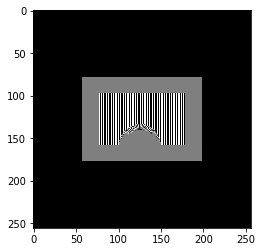

In [23]:
print(np.unique((y1)))
print(y1[0].shape)
plt.imshow(y1[10],'gray')

In [24]:
gan_y = np.array(y1).reshape((-1,)+input_shape)
gan_x = np.copy(x)
gan_x1 = np.copy(x1)
gan_y1 = np.copy(gan_x1)

Test images 


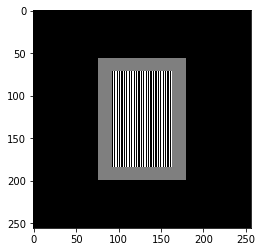

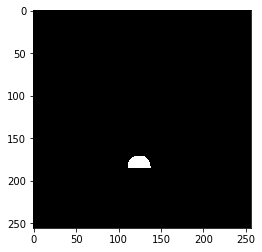

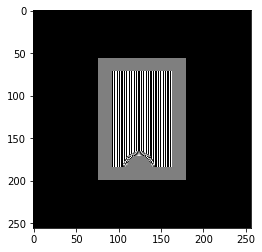

Epoch 101, g_loss 1.5227 d_loss 0.2281 c loss 0.1202 flow loss 0.4146, time 37.9189


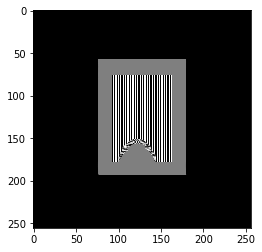

----------------------------------------------------------------------------------------------------
Epoch 102, g_loss 1.5056 d_loss 0.2297 c loss 0.1191 flow loss 0.3668, time 67.2201


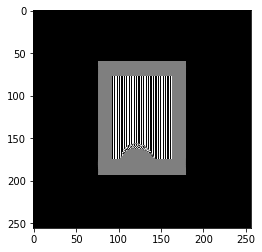

----------------------------------------------------------------------------------------------------
Epoch 103, g_loss 1.4626 d_loss 0.2302 c loss 0.1149 flow loss 0.378, time 96.1572


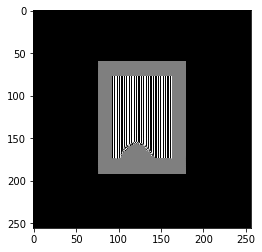

----------------------------------------------------------------------------------------------------
Epoch 104, g_loss 1.494 d_loss 0.2313 c loss 0.1182 flow loss 0.4116, time 125.0262


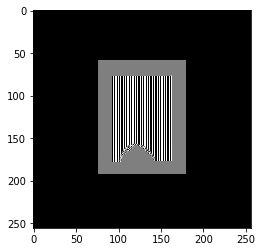

----------------------------------------------------------------------------------------------------
Epoch 105, g_loss 1.4954 d_loss 0.234 c loss 0.1191 flow loss 0.3744, time 153.8834


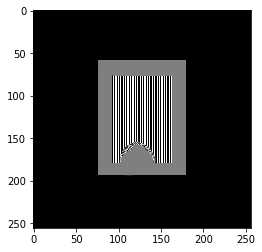

----------------------------------------------------------------------------------------------------
Epoch 106, g_loss 1.4438 d_loss 0.2325 c loss 0.1138 flow loss 0.3885, time 182.6619


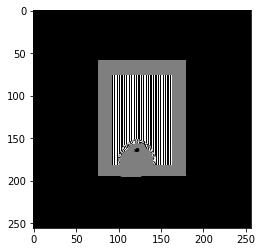

----------------------------------------------------------------------------------------------------
Epoch 107, g_loss 1.5201 d_loss 0.2286 c loss 0.1204 flow loss 0.4508, time 211.4781


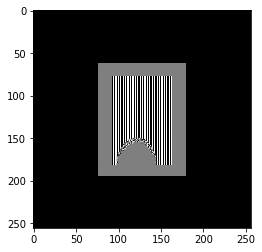

----------------------------------------------------------------------------------------------------
Epoch 108, g_loss 1.5151 d_loss 0.2282 c loss 0.1197 flow loss 0.3949, time 240.3658


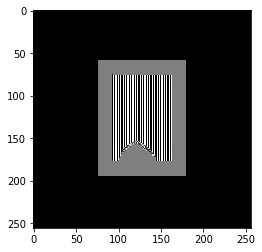

----------------------------------------------------------------------------------------------------
Epoch 109, g_loss 1.5446 d_loss 0.2276 c loss 0.1225 flow loss 0.477, time 269.1902


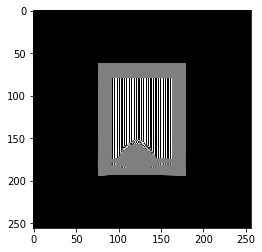

----------------------------------------------------------------------------------------------------
Epoch 110, g_loss 1.5347 d_loss 0.2264 c loss 0.121 flow loss 0.6038, time 297.892


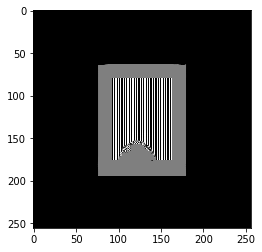

----------------------------------------------------------------------------------------------------
Epoch 111, g_loss 1.5433 d_loss 0.2219 c loss 0.1206 flow loss 0.6776, time 326.6042


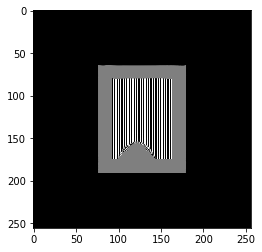

----------------------------------------------------------------------------------------------------
Epoch 112, g_loss 1.541 d_loss 0.2161 c loss 0.1188 flow loss 0.7567, time 355.4003


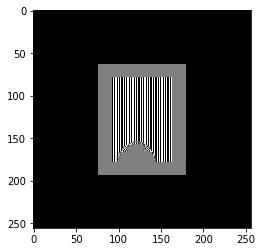

----------------------------------------------------------------------------------------------------
Epoch 113, g_loss 1.5077 d_loss 0.2269 c loss 0.1182 flow loss 0.4102, time 384.2519


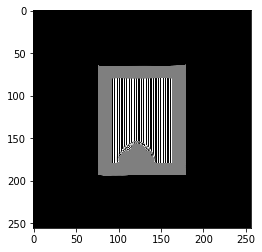

----------------------------------------------------------------------------------------------------
Epoch 114, g_loss 1.5357 d_loss 0.2259 c loss 0.1208 flow loss 0.5218, time 413.1446


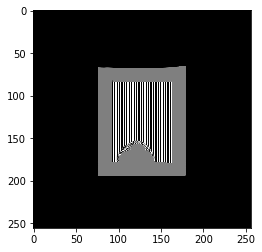

----------------------------------------------------------------------------------------------------
Epoch 115, g_loss 1.5293 d_loss 0.2235 c loss 0.1196 flow loss 0.4935, time 441.9538


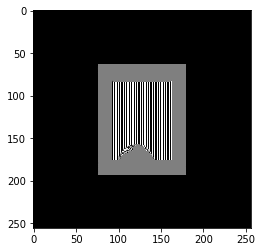

----------------------------------------------------------------------------------------------------
Epoch 116, g_loss 1.4989 d_loss 0.2229 c loss 0.1166 flow loss 0.4784, time 470.7999


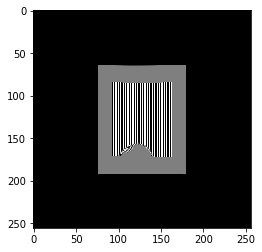

----------------------------------------------------------------------------------------------------
Epoch 117, g_loss 1.54 d_loss 0.2171 c loss 0.1192 flow loss 0.4193, time 499.656


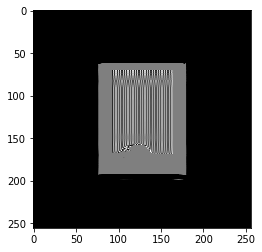

----------------------------------------------------------------------------------------------------
Epoch 118, g_loss 1.6256 d_loss 0.1809 c loss 0.1182 flow loss 0.4208, time 528.4319


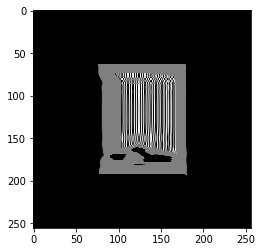

----------------------------------------------------------------------------------------------------
Epoch 119, g_loss 1.6536 d_loss 0.1748 c loss 0.1189 flow loss 0.9195, time 557.2221


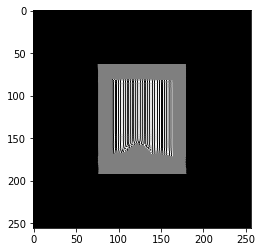

----------------------------------------------------------------------------------------------------
Epoch 120, g_loss 1.6225 d_loss 0.1844 c loss 0.1183 flow loss 0.5922, time 586.1865


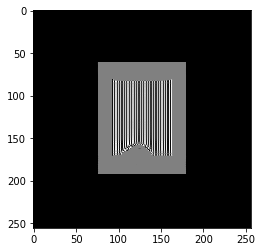

----------------------------------------------------------------------------------------------------
Epoch 121, g_loss 1.6217 d_loss 0.1928 c loss 0.1205 flow loss 0.785, time 615.1552


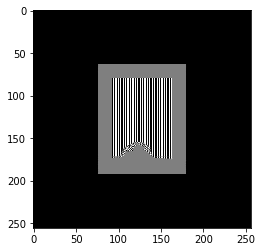

----------------------------------------------------------------------------------------------------
Epoch 122, g_loss 1.5868 d_loss 0.2009 c loss 0.1188 flow loss 0.4042, time 643.83


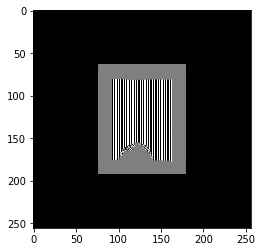

----------------------------------------------------------------------------------------------------
Epoch 123, g_loss 1.5968 d_loss 0.2236 c loss 0.1252 flow loss 0.3529, time 672.546


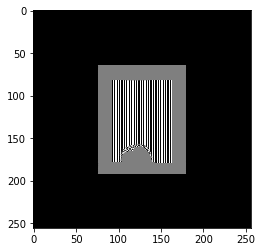

----------------------------------------------------------------------------------------------------
Epoch 124, g_loss 1.5752 d_loss 0.2104 c loss 0.1205 flow loss 0.4446, time 701.3741


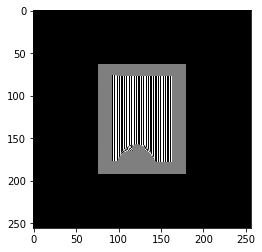

----------------------------------------------------------------------------------------------------
Epoch 125, g_loss 1.5648 d_loss 0.2023 c loss 0.1172 flow loss 0.3456, time 730.2368


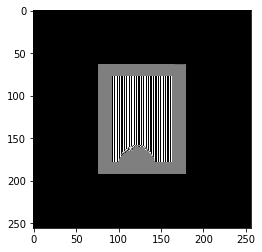

----------------------------------------------------------------------------------------------------
Epoch 126, g_loss 1.5763 d_loss 0.2015 c loss 0.1181 flow loss 0.4088, time 759.0331


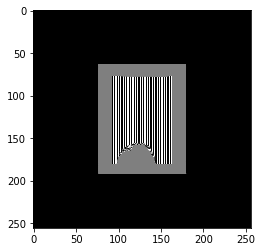

----------------------------------------------------------------------------------------------------
Epoch 127, g_loss 1.5831 d_loss 0.2004 c loss 0.1188 flow loss 0.921, time 787.8661


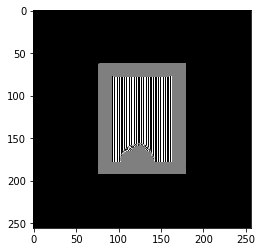

----------------------------------------------------------------------------------------------------
Epoch 128, g_loss 1.5164 d_loss 0.2171 c loss 0.1155 flow loss 0.3369, time 816.5468


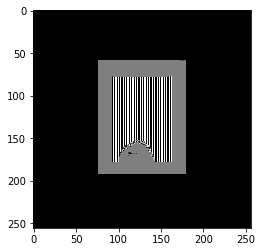

----------------------------------------------------------------------------------------------------
Epoch 129, g_loss 1.5328 d_loss 0.2251 c loss 0.1197 flow loss 0.3343, time 845.4125


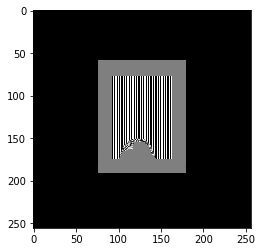

----------------------------------------------------------------------------------------------------
Epoch 130, g_loss 1.5104 d_loss 0.2275 c loss 0.1179 flow loss 0.3466, time 874.1941


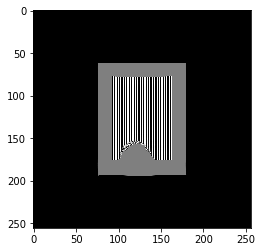

----------------------------------------------------------------------------------------------------
Epoch 131, g_loss 1.5028 d_loss 0.2285 c loss 0.1181 flow loss 0.3463, time 902.8704


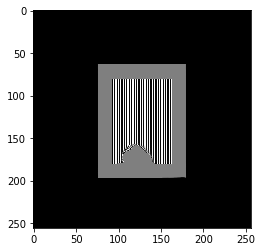

----------------------------------------------------------------------------------------------------
Epoch 132, g_loss 1.5026 d_loss 0.2265 c loss 0.1177 flow loss 0.3987, time 931.6259


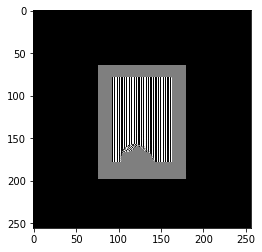

----------------------------------------------------------------------------------------------------
Epoch 133, g_loss 1.5168 d_loss 0.2268 c loss 0.1191 flow loss 0.3488, time 960.5873


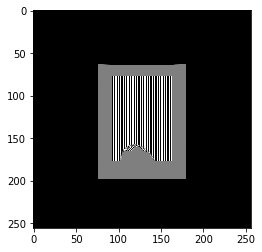

----------------------------------------------------------------------------------------------------
Epoch 134, g_loss 1.5546 d_loss 0.225 c loss 0.1225 flow loss 0.4003, time 989.4695


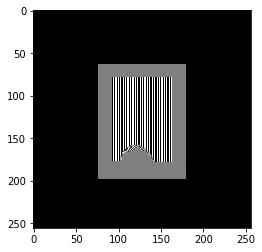

----------------------------------------------------------------------------------------------------
Epoch 135, g_loss 1.5173 d_loss 0.2252 c loss 0.1188 flow loss 0.3494, time 1018.2641


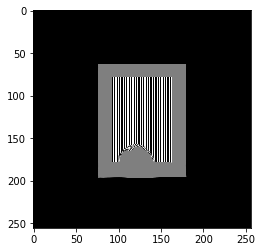

----------------------------------------------------------------------------------------------------
Epoch 136, g_loss 1.557 d_loss 0.2281 c loss 0.1233 flow loss 0.3975, time 1047.1148


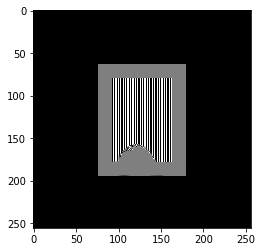

----------------------------------------------------------------------------------------------------
Epoch 137, g_loss 1.5044 d_loss 0.2294 c loss 0.1185 flow loss 0.5031, time 1076.0841


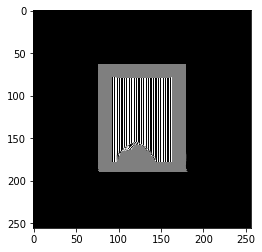

----------------------------------------------------------------------------------------------------
Epoch 138, g_loss 1.516 d_loss 0.228 c loss 0.1194 flow loss 0.4822, time 1104.9606


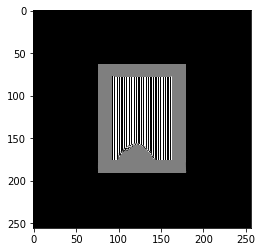

----------------------------------------------------------------------------------------------------
Epoch 139, g_loss 1.5034 d_loss 0.2274 c loss 0.1179 flow loss 0.4585, time 1133.7878


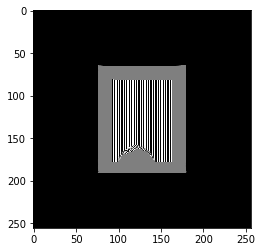

----------------------------------------------------------------------------------------------------
Epoch 140, g_loss 1.5459 d_loss 0.2252 c loss 0.1216 flow loss 0.5082, time 1162.6162


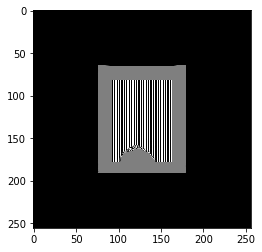

----------------------------------------------------------------------------------------------------
Epoch 141, g_loss 1.514 d_loss 0.2263 c loss 0.1187 flow loss 0.5247, time 1191.5045


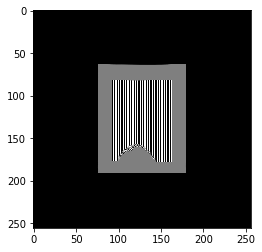

----------------------------------------------------------------------------------------------------
Epoch 142, g_loss 1.4892 d_loss 0.2272 c loss 0.1165 flow loss 0.4548, time 1220.311


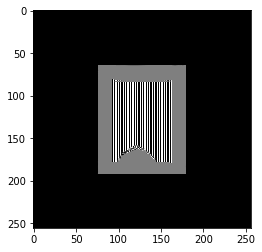

----------------------------------------------------------------------------------------------------
Epoch 143, g_loss 1.5004 d_loss 0.2265 c loss 0.1174 flow loss 0.4246, time 1249.2406


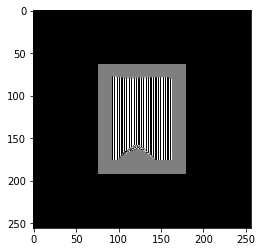

----------------------------------------------------------------------------------------------------
Epoch 144, g_loss 1.4713 d_loss 0.2282 c loss 0.1149 flow loss 0.447, time 1278.039


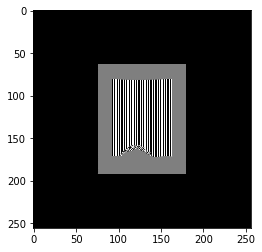

----------------------------------------------------------------------------------------------------
Epoch 145, g_loss 1.4893 d_loss 0.2304 c loss 0.1175 flow loss 0.4696, time 1306.9702


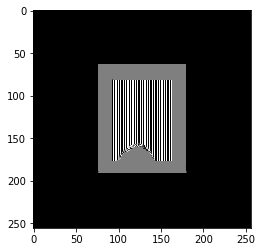

----------------------------------------------------------------------------------------------------
Epoch 146, g_loss 1.4997 d_loss 0.2267 c loss 0.1174 flow loss 0.5447, time 1336.0846


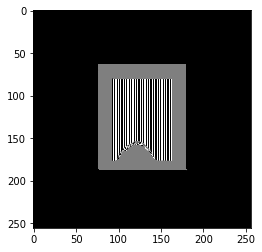

----------------------------------------------------------------------------------------------------
Epoch 147, g_loss 1.5024 d_loss 0.2271 c loss 0.1178 flow loss 0.582, time 1364.9245


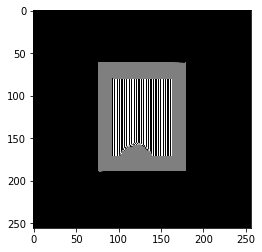

----------------------------------------------------------------------------------------------------
Epoch 148, g_loss 1.5395 d_loss 0.2261 c loss 0.1212 flow loss 0.5184, time 1393.8304


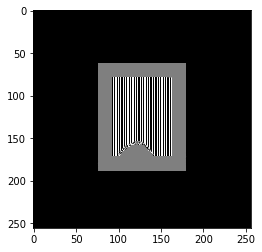

----------------------------------------------------------------------------------------------------
Epoch 149, g_loss 1.5507 d_loss 0.2251 c loss 0.1221 flow loss 0.5188, time 1422.6692


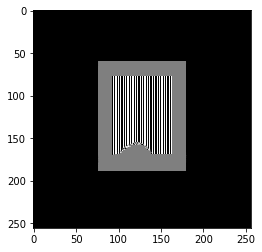

----------------------------------------------------------------------------------------------------
Epoch 150, g_loss 1.5499 d_loss 0.2106 c loss 0.118 flow loss 0.3907, time 1451.6041


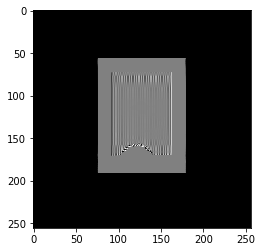

----------------------------------------------------------------------------------------------------
Epoch 151, g_loss 1.5609 d_loss 0.2012 c loss 0.1164 flow loss 0.3152, time 1496.2544


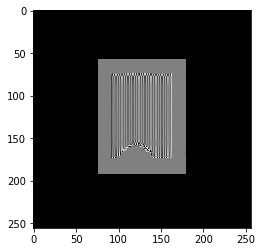

----------------------------------------------------------------------------------------------------
Epoch 152, g_loss 1.5618 d_loss 0.2027 c loss 0.1168 flow loss 0.3021, time 1525.0908


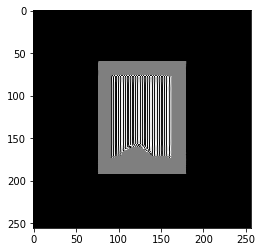

----------------------------------------------------------------------------------------------------
Epoch 153, g_loss 1.5532 d_loss 0.2015 c loss 0.1157 flow loss 0.3529, time 1554.0708


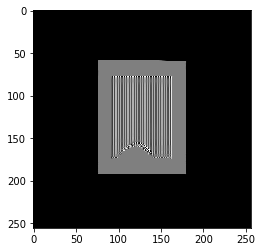

----------------------------------------------------------------------------------------------------
Epoch 154, g_loss 1.5448 d_loss 0.2005 c loss 0.1146 flow loss 0.3752, time 1582.9266


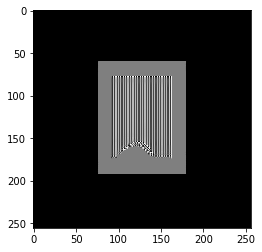

----------------------------------------------------------------------------------------------------
Epoch 155, g_loss 1.5649 d_loss 0.2006 c loss 0.1165 flow loss 0.3305, time 1611.7954


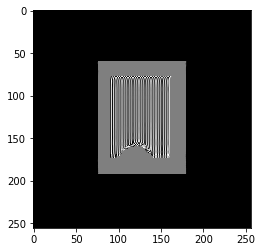

----------------------------------------------------------------------------------------------------
Epoch 156, g_loss 1.5668 d_loss 0.2016 c loss 0.117 flow loss 0.3271, time 1640.6184


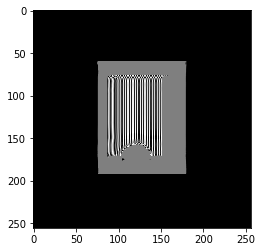

----------------------------------------------------------------------------------------------------
Epoch 157, g_loss 1.7039 d_loss 0.1961 c loss 0.128 flow loss 2.757, time 1669.6892


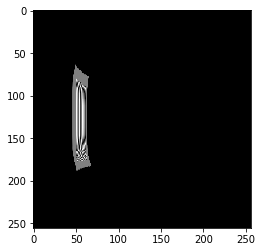

----------------------------------------------------------------------------------------------------
Epoch 158, g_loss 1.6722 d_loss 0.1965 c loss 0.1267 flow loss 1.4227, time 1698.5954


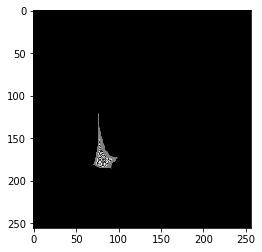

----------------------------------------------------------------------------------------------------
Epoch 159, g_loss 1.6597 d_loss 0.1962 c loss 0.1254 flow loss 1.1604, time 1727.4767


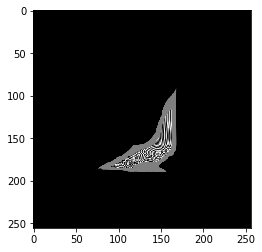

----------------------------------------------------------------------------------------------------
Epoch 160, g_loss 1.643 d_loss 0.1946 c loss 0.1233 flow loss 0.9543, time 1756.2941


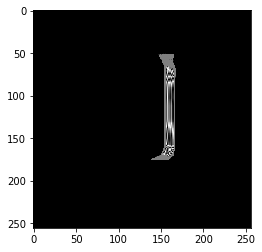

----------------------------------------------------------------------------------------------------
Epoch 161, g_loss 1.6701 d_loss 0.1941 c loss 0.1242 flow loss 2.3579, time 1785.0905


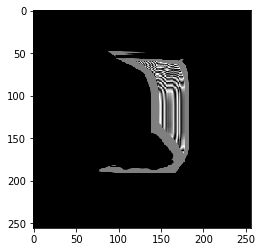

----------------------------------------------------------------------------------------------------
Epoch 162, g_loss 1.6198 d_loss 0.1943 c loss 0.1202 flow loss 0.5278, time 1814.141


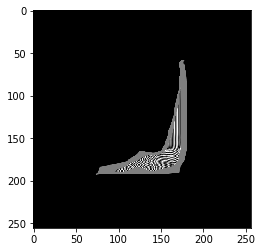

----------------------------------------------------------------------------------------------------
Epoch 163, g_loss 1.6344 d_loss 0.1939 c loss 0.1219 flow loss 0.7444, time 1842.8745


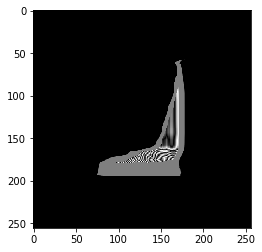

----------------------------------------------------------------------------------------------------
Epoch 164, g_loss 1.6295 d_loss 0.195 c loss 0.1219 flow loss 0.6661, time 1871.6689


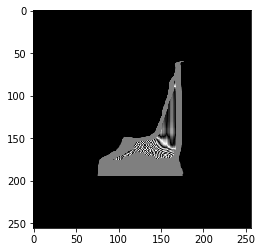

----------------------------------------------------------------------------------------------------
Epoch 165, g_loss 1.5943 d_loss 0.1931 c loss 0.1179 flow loss 0.5844, time 1900.5164


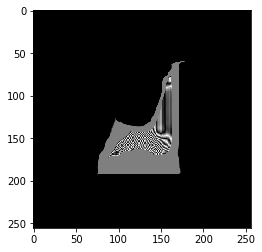

----------------------------------------------------------------------------------------------------
Epoch 166, g_loss 1.6451 d_loss 0.1916 c loss 0.1225 flow loss 0.764, time 1929.6149


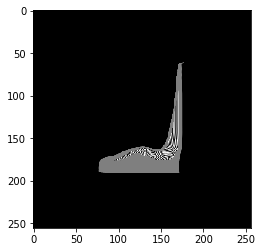

----------------------------------------------------------------------------------------------------
Epoch 167, g_loss 1.6324 d_loss 0.1931 c loss 0.1215 flow loss 0.8454, time 1958.338


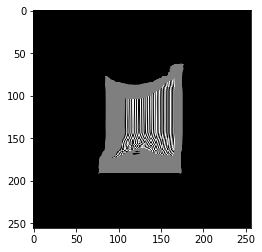

----------------------------------------------------------------------------------------------------
Epoch 168, g_loss 1.6109 d_loss 0.1927 c loss 0.1193 flow loss 0.5444, time 1987.1898


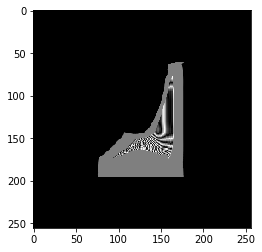

----------------------------------------------------------------------------------------------------
Epoch 169, g_loss 1.6046 d_loss 0.1947 c loss 0.1191 flow loss 0.4797, time 2015.9549


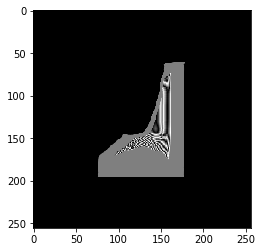

----------------------------------------------------------------------------------------------------
Epoch 170, g_loss 1.598 d_loss 0.1979 c loss 0.1193 flow loss 0.5922, time 2044.819


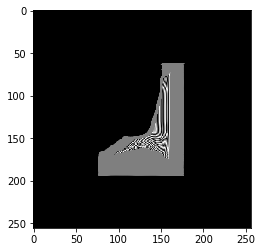

----------------------------------------------------------------------------------------------------
Epoch 171, g_loss 1.6036 d_loss 0.1962 c loss 0.1195 flow loss 0.6114, time 2073.6339


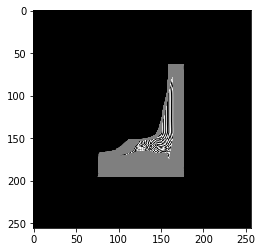

----------------------------------------------------------------------------------------------------
Epoch 172, g_loss 1.5811 d_loss 0.1983 c loss 0.1177 flow loss 0.7317, time 2103.188


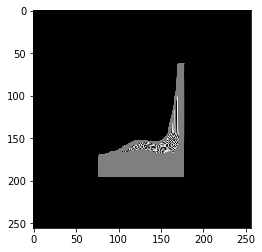

----------------------------------------------------------------------------------------------------
Epoch 173, g_loss 1.5811 d_loss 0.1966 c loss 0.1175 flow loss 0.5203, time 2132.0427


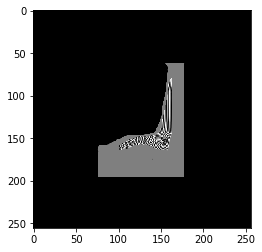

----------------------------------------------------------------------------------------------------
Epoch 174, g_loss 1.6043 d_loss 0.1948 c loss 0.1193 flow loss 0.5084, time 2160.9373


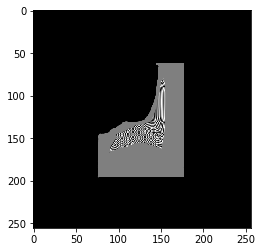

----------------------------------------------------------------------------------------------------
Epoch 175, g_loss 1.6053 d_loss 0.1949 c loss 0.1193 flow loss 0.5195, time 2189.687


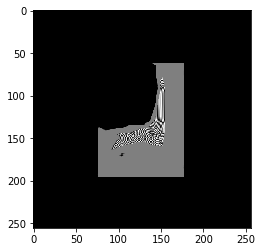

----------------------------------------------------------------------------------------------------
Epoch 176, g_loss 1.5882 d_loss 0.1982 c loss 0.1181 flow loss 0.5271, time 2218.3778


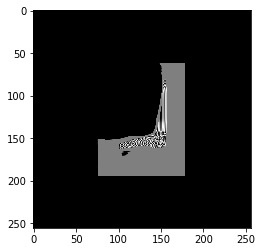

----------------------------------------------------------------------------------------------------
Epoch 177, g_loss 1.5699 d_loss 0.1978 c loss 0.1164 flow loss 0.6617, time 2247.1856


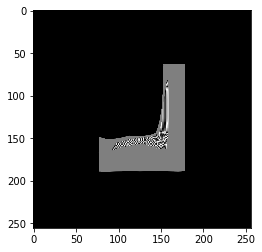

----------------------------------------------------------------------------------------------------
Epoch 178, g_loss 1.5989 d_loss 0.1956 c loss 0.1186 flow loss 0.6213, time 2276.2217


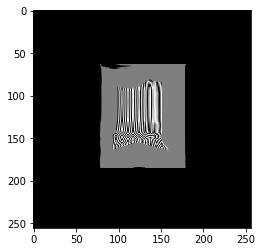

----------------------------------------------------------------------------------------------------
Epoch 179, g_loss 1.6229 d_loss 0.1958 c loss 0.1204 flow loss 0.6713, time 2305.1816


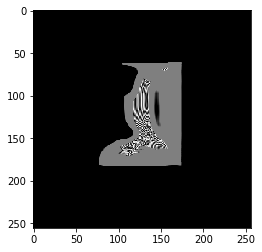

----------------------------------------------------------------------------------------------------
Epoch 180, g_loss 1.6149 d_loss 0.1953 c loss 0.1199 flow loss 1.1365, time 2334.128


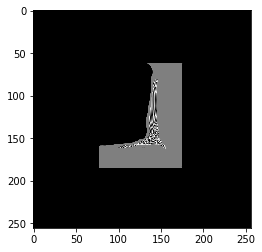

----------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [38]:
reload(networks)

real_a = tf.keras.layers.Input(input_shape)
real_b = tf.keras.layers.Input(input_shape)

mask_a = tf.keras.layers.Input(input_shape)
mask_b = tf.keras.layers.Input(input_shape)

nf_enc = [16, 32, 32, 32]
nf_dec = [32, 32, 32, 32, 8, 8]

g_a2b = networks.generator(real_a, mask_a, nf_enc, nf_dec, flow_out=True)
d_a = networks.gan_discriminator(real_a)

g_b2a = networks.generator(real_b, mask_b, nf_enc, nf_dec, flow_out=True)
d_b = networks.gan_discriminator(real_b)

# print(g_a2b.summary())
# print(d_a.summary())

fake_b, flow_b = g_a2b([real_a, mask_a])
fake_a, flow_a = g_b2a([real_b, mask_b])

recon_b = g_a2b([real_a, mask_a])[0]
recon_a = g_b2a([real_b, mask_b])[0]

fake_a_pred = d_a(fake_a)
fake_b_pred = d_b(fake_b)

real_a_pred = d_a(real_a)
real_b_pred = d_b(real_b)

def mse(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

def mae(y_true,y_pred):
    return tf.reduce_mean(tf.abs(y_true-y_pred))

reconstructions = tf.keras.layers.Concatenate(axis=0, name='reconstructions')([recon_a, recon_b])
flows = tf.keras.layers.Concatenate(axis=0, name='flows')([flow_a, flow_b])
d_predictions = tf.keras.layers.Concatenate(axis=0, name='d_predictions')([fake_a_pred, fake_b_pred])
real = tf.keras.layers.Concatenate(axis=0, name='real')([real_a, real_b])

cycle_loss = mae(real, reconstructions)
# flow_loss1 = mse(flows, tf.concat([tf.zeros_like(flow_a), tf.zeros_like(flow_b)],0))
flow_loss = losses.Grad('l2').loss(tf.zeros_like(flows), flows)

g_loss = mse(tf.ones_like(d_predictions), d_predictions) + 10*cycle_loss + 0.01*flow_loss

d_A_loss = mse(tf.concat([tf.ones_like(real_a_pred), tf.zeros_like(fake_a_pred)],0), tf.concat([real_a_pred, fake_a_pred],0))
d_B_loss = mse(tf.concat([tf.ones_like(real_b_pred), tf.zeros_like(fake_b_pred)],0), tf.concat([real_b_pred, fake_b_pred],0))
d_loss = 0.5*(d_A_loss+d_B_loss)

lr = 2e-4

update_g_a2b = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.5, beta2=0.999).minimize(g_loss, var_list=g_a2b.trainable_weights)
update_g_b2a = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.5, beta2=0.999).minimize(g_loss, var_list=g_b2a.trainable_weights)
update_d_a = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.5, beta2=0.999).minimize(d_loss, var_list=d_a.trainable_weights)
update_d_b = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.5, beta2=0.999).minimize(d_loss, var_list=d_b.trainable_weights)

g_train = [update_g_a2b, update_g_b2a]
d_train = [update_d_a, update_d_b]

batch_size = 1

sess.run(tf.global_variables_initializer())

# g_a2b.load_weights('../models_1/g_a2b_cp.h5')
# g_b2a.load_weights('../models_1/g_b2a_cp.h5')
# d_a.load_weights('../models_1/d_a_cp.h5')
# d_b.load_weights('../models_1/d_b_cp.h5')


g_a2b.load_weights('../models_1/g_a2b.h5')
g_b2a.load_weights('../models_1/g_b2a.h5')
d_a.load_weights('../models_1/d_a.h5')
d_b.load_weights('../models_1/d_b.h5')

count = len(gan_x)//batch_size

start = time.time()
save_step = 50

test_img = x[0]
test_mask = x1[0]
test_y = y[0]

print('Test images ')

plt.imshow(np.squeeze(test_img),'gray')
plt.show()

plt.imshow(np.squeeze(test_mask),'gray')
plt.show()

plt.imshow(np.squeeze(test_y),'gray')
plt.show()

for i in range(101,1000):
    p1 = np.random.permutation(len(gan_x))
    gan_x = gan_x[p1]
    gan_x1 = gan_x1[p1]
    
    p2 = np.random.permutation(len(gan_y))
    gan_y = gan_y[p2]
    gan_y1 = gan_y1[p2]
    
    
    total_g_loss = 0
    total_cycle_loss = 0
    total_flow_loss = 0
    total_d_loss = 0
    
    for j in range(count):
        batch_x = gan_x[j:j+batch_size]
        batch_y = gan_y[j:j+batch_size]
        
        batch_x1 = gan_x1[j:j+batch_size]
        batch_y1 = gan_y1[j:j+batch_size]
        
        _,_, cycle_loss_val, flow_loss_val, g_loss_val, d_loss_val = sess.run(
                                        [g_train, d_train, cycle_loss, flow_loss, g_loss, d_loss],
                                        feed_dict={real_a: batch_x, real_b:batch_y,
                                                  mask_a: batch_x1, mask_b : batch_y1})
                
        total_g_loss+=g_loss_val
        total_d_loss+=d_loss_val
        total_cycle_loss+=cycle_loss_val
        total_flow_loss+=flow_loss_val
        
        
    print('Epoch {}, g_loss {} d_loss {} c loss {} flow loss {}, time {}'
          .format(i,round(total_g_loss/count,4),round(total_d_loss/count,4),
                  round(total_cycle_loss/count,4), round(total_flow_loss/count,4), round(time.time()-start,4)))
    
    pred, flow_pred = sess.run([fake_b, flow_b], feed_dict={real_a: [test_img], mask_a: [test_mask]})
    plt.imshow(np.squeeze(pred),'gray')
    plt.show()
    
#     print(flow_pred.shape)
    
#     plt.imshow(flow_pred[0][:,:,0],'gray')
#     plt.show()
    
#     plt.imshow(flow_pred[0][:,:,1],'gray')
#     plt.show()
    
    print('-'*100)
    
    if i % save_step == 0:
        g_a2b.save('../models_1/g_a2b_cp.h5')
        g_b2a.save('../models_1/g_b2a_cp.h5')
        d_a.save('../models_1/d_a_cp.h5')
        d_b.save('../models_1/d_b_cp.h5')

In [40]:
# g_a2b.save('../models_1/g_a2b.h5')
# g_b2a.save('../models_1/g_b2a.h5')
# d_a.save('../models_1/d_a.h5')
# d_b.save('../models_1/d_b.h5')

reload(networks)

real_a = tf.keras.layers.Input(input_shape)
real_b = tf.keras.layers.Input(input_shape)

mask_a = tf.keras.layers.Input(input_shape)
mask_b = tf.keras.layers.Input(input_shape)

nf_enc = [16, 32, 32, 32]
nf_dec = [32, 32, 32, 32, 8, 8]

g_a2b = networks.generator(real_a, mask_a, nf_enc, nf_dec, flow_out=True)
d_a = networks.gan_discriminator(real_a)

g_b2a = networks.generator(real_b, mask_b, nf_enc, nf_dec, flow_out=True)
d_b = networks.gan_discriminator(real_b)

g_a2b.load_weights('../models_1/g_a2b.h5')
g_b2a.load_weights('../models_1/g_b2a.h5')
d_a.load_weights('../models_1/d_a.h5')
d_b.load_weights('../models_1/d_b.h5')


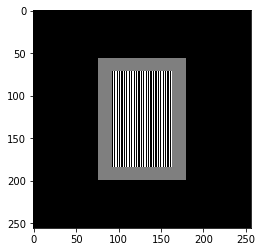

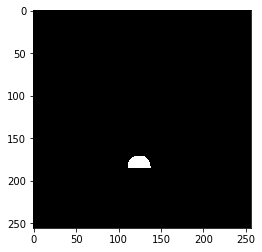

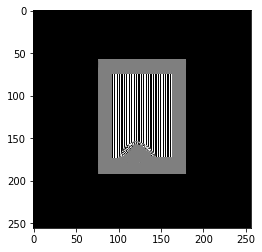

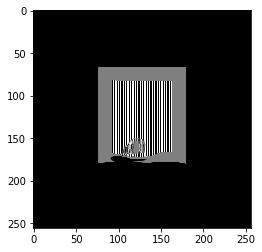

In [45]:

i = np.random.randint(100)
img = x[i]
mask = x1[i]


pred = g_a2b.predict([np.expand_dims(img,0),np.expand_dims(mask,0)])

plt.imshow(np.squeeze(img),'gray')
plt.show()

plt.imshow(np.squeeze(mask),'gray')
plt.show()

plt.imshow(np.squeeze(pred[0]),'gray')
plt.show()

plt.imsave('stg_unpaired_1.png', crop(np.squeeze(pred[0])), cmap='gray')

pred = g_b2a.predict([pred[0],np.expand_dims(mask,0)])

# print(np.unique(pred))
plt.imshow(np.squeeze(pred[0]),'gray')
plt.show()

In [21]:
reload(networks)
x_train = np.concatenate((gan_x,gan_y), axis=0)

d=networks.gan_discriminator(real_a)
outputs_shape=tuple(d.output.shape.as_list())
# print(outputs.shape.as_list())

y_train = np.concatenate((np.zeros((len(gan_x),)+outputs_shape[1:]), np.ones((len(gan_x),)+outputs_shape[1:])))
d.compile('adam', loss='mse', metrics=['acc'])
d.fit(x_train, y_train, epochs=20, batch_size=1)


Epoch 1/20
 162/1000 [===>..........................] - ETA: 16s - loss: 0.2690 - acc: 0.4588

KeyboardInterrupt: 